In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel(r"C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\data\Well-6_01-07-2022.xlsx")

In [19]:
df["STATUS"].sum()

109

In [46]:
data =df[['TVA (m3)', 'SPPA (kPa)', 'MFOA (m3/s)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']]

In [3]:
def predict_kick(df, window_size):
    # Prepare data for prediction
    scaler = StandardScaler()
    data = scaler.fit_transform(df)
    print(scaler.mean_)
    data = pd.DataFrame(data, columns=['TVA (m3)', 'SPPA (kPa)', 'MFOA (m3/s)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)'])
    data["Kick"] = 0
    
    # Use rolling window to create features and target variable
    for i in range(window_size, df.shape[0]):
        window_data = data.iloc[i-window_size:i]
        if window_data['GASA (mol/mol)'].mean() >= 0.056959633:
            window_data["Kick"] = 1
        else:
            window_data["Kick"] = 0
        data.iloc[i] = window_data.iloc[-1]
    
    # Drop first rows with NaNs due to rolling window
    data = data.iloc[window_size:]
    return data


In [36]:

data1=predict_kick(data, window_size)

[4.76245602e+01 2.10919643e+03 0.00000000e+00 4.76030093e-02
 3.13706597e-03]


C:\Users\hp\AppData\Local\Temp\ipykernel_14528\1227805030.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_data["Kick"] = 0


In [31]:
data1['Kick'].sum()

0

In [55]:
import pandas as pd

def detect_kick(df, window_size):
    # Define the features
    features = ['TVA (m3)', 'SPPA (kPa)', 'MFOA (m3/s)',
       'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']
    
    # Compute the rolling means of the features
    for feature in features:
        df[f'{feature}_rolling_mean'] = df[feature].rolling(window_size).mean()
    
    # Define the kick detection rule
    tva_thresh =  df['TVA (m3)_rolling_mean'].mean()
    mfop_thresh =  df['MFOP ((m3/s)/(m3/s))_rolling_mean'].mean()
    mfoa_thresh =  df['MFOA (m3/s)_rolling_mean'].mean()
    spp_thresh =  df['SPPA (kPa)_rolling_mean'].mean()
    gas_thresh =  df['GASA (mol/mol)_rolling_mean'].mean()
    print(tva_thresh,mfop_thresh,mfoa_thresh,spp_thresh,spp_thresh,gas_thresh)
    
    # Apply the kick detection rule
    df['Kick'] = ((df['TVA (m3)_rolling_mean'] < tva_thresh) &
                  (df['MFOP ((m3/s)/(m3/s))_rolling_mean'] > mfop_thresh) &
                  (df['MFOA (m3/s)_rolling_mean'] > mfoa_thresh) &
                  (df['SPPA (kPa)_rolling_mean'] > spp_thresh) &
                  (df['GASA (mol/mol)_rolling_mean'] > gas_thresh)).astype(int)
    
    return df



In [56]:
window_size=109
data1=detect_kick(data, window_size)

47.57487092279516 0.04754005881133572 0.0 2092.9460098558716 2092.9460098558716 0.003127484469063143


In [59]:
data1.to_excel('data_rolling.xlsx',index=False)

In [41]:
import pandas as pd

# Create a sample time series
df = pd.DataFrame({'value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Calculate the rolling mean with a window size of 3
df['rolling_mean'] = df['value'].rolling(window=5).mean()

# Print the results
print(df)

   value  rolling_mean
0      1           NaN
1      2           NaN
2      3           NaN
3      4           NaN
4      5           3.0
5      6           4.0
6      7           5.0
7      8           6.0
8      9           7.0
9     10           8.0


In [2]:
my_list = [1, 1, 1, 1]
result = all(my_list)
print(result)

True


In [4]:
import pandas as pd

In [9]:
df=pd.read_excel(r"C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\dataset\Well-6.xlsx")

df.dtypes
df['kick_recognition']=0
df.shape


(17280, 16)

<Axes: >

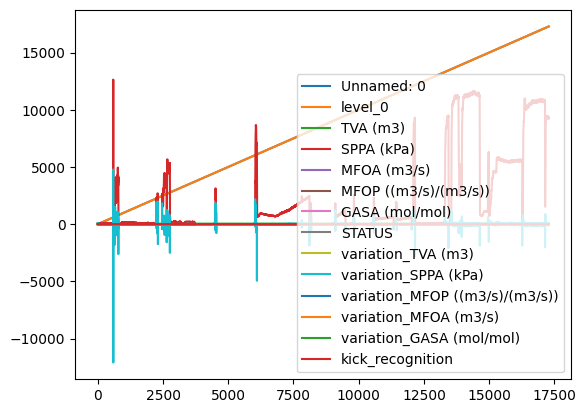

In [22]:
df.plot()

In [10]:
df.columns

Index(['Unnamed: 0', 'level_0', 'index', 'TVA (m3)', 'SPPA (kPa)',
       'MFOA (m3/s)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)', 'STATUS',
       'Unnamed: 41', 'variation_TVA (m3)', 'variation_SPPA (kPa)',
       'variation_MFOP ((m3/s)/(m3/s))', 'variation_MFOA (m3/s)',
       'variation_GASA (mol/mol)', 'kick_recognition'],
      dtype='object')

In [18]:

def feature_rep(window,tva_thresh,mfop_thresh,mfoa_thresh,spp_thresh,gas_thresh):
    gasa,mfoa,spp,mfop,tva=False,False,False,False,False
    if window['variation_GASA (mol/mol)'].sum()>=gas_thresh:
        gasa=True
    if window['variation_TVA (m3)'].sum()>tva_thresh:
        tva=True
    if window['variation_SPPA (kPa)'].sum()<spp_thresh:
        spp=True
    if window['variation_MFOA (m3/s)'].sum()<mfoa_thresh:
        mfoa=True
    if window['variation_MFOP ((m3/s)/(m3/s))'].sum()<=mfop_thresh:
        mfop= True
    
    return [gasa,mfoa,mfop,spp,tva]

def kick_detection(featurs):
    return all(featurs)
    

In [ ]:

window_size = 120
window_size = int(window_size // 5)# convert time to rows
windows = df.groupby((df.index // window_size) + 1)
windows.head()

In [20]:
result=[]
all_result=[]
tva_thresh=0
mfop_thresh=0
mfoa_thresh=0
spp_thresh=0
spp_thresh=0
for i, batch in windows:
    # print(f'--------window number {i}--------')
    # print(batch.head(5))
    featurs=feature_rep(batch,tva_thresh,mfop_thresh,mfoa_thresh,spp_thresh,gas_thresh=0.05)
    cla=kick_detection(featurs)
    result.append(int(cla))
    # df['kick_recognition'][i:i+window_size]=int(cla)
    

    


In [ ]:
while tva_thresh>73.3:
    while mfop_thresh<0.18:
        mfop_thresh=mfop_thresh+0.01
        while spp_thresh<11.48*
    tva_thresh=tva_thresh+0.1

In [21]:
set(result)

{0}

In [137]:
df['kick_recognition']

0    0
1    0
2    0
3    0
4    0
Name: kick_recognition, dtype: int64

In [143]:
total_percentage_diff = ((df['STATUS'] - df['kick_recognition'])).sum() * 100 / len(df)

In [144]:
total_percentage_diff

0.6307870370370371

In [130]:
print(set(result))
indices = [i for i in range(len(result)) if result[i] ==1]
indices

set()


[]